In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df = pd.read_csv('C:/Users/GSDS/Desktop/technology_product_sales_data.csv')

In [49]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [50]:
# Encode categorical variables
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [51]:
# Drop ProductID
data = df.drop('ProductID', axis=1)

In [52]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [53]:
# Try PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [54]:
# Function to evaluate clustering methods
def evaluate_clustering(method, data):
    labels = method.fit_predict(data)
    return silhouette_score(data, labels)

In [55]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_score = evaluate_clustering(kmeans, scaled_data)

In [56]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_score = evaluate_clustering(agglo, scaled_data)

In [57]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_score = evaluate_clustering(dbscan, scaled_data)

In [58]:
# KMeans Clustering with PCA-reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca_score = evaluate_clustering(kmeans_pca, pca_data)

In [59]:
# Agglomerative Clustering with PCA-reduced data
agglo_pca = AgglomerativeClustering(n_clusters=5)
agglo_pca_score = evaluate_clustering(agglo_pca, pca_data)

In [60]:
def evaluate_clustering(method, data):
    labels = method.fit_predict(data)
    if len(np.unique(labels)) <= 1:
        raise ValueError(f"Number of labels is {len(np.unique(labels))}. Valid values are 2 to n_samples - 1 (inclusive)")
    return silhouette_score(data, labels)

In [61]:
# Adjust DBSCAN parameters
dbscan_pca = DBSCAN(eps=0.3, min_samples=10)
try:
    dbscan_pca_score = evaluate_clustering(dbscan_pca, pca_data)
    print(f"Silhouette Score: {dbscan_pca_score}")
except ValueError as e:
    print(e)

Silhouette Score: 0.37177430710665316


In [62]:
# Print Silhouette Scores
print(f'KMeans Silhouette Score: {kmeans_score}')
print(f'Agglomerative Clustering Silhouette Score: {agglo_score}')
print(f'DBSCAN Silhouette Score: {dbscan_score}')
print(f'KMeans with PCA Silhouette Score: {kmeans_pca_score}')
print(f'Agglomerative Clustering with PCA Silhouette Score: {agglo_pca_score}')
print(f'DBSCAN with PCA Silhouette Score: {dbscan_pca_score}')

KMeans Silhouette Score: 0.13373682359396724
Agglomerative Clustering Silhouette Score: 0.13424956077527161
DBSCAN Silhouette Score: -0.3154526784752426
KMeans with PCA Silhouette Score: 0.3933764095181435
Agglomerative Clustering with PCA Silhouette Score: 0.37162447651250685
DBSCAN with PCA Silhouette Score: 0.37177430710665316


In [64]:
# Collect scores
scores = [
    ('KMeans', kmeans_score, kmeans_labels, scaled_data),
    ('Agglomerative Clustering', agglo_score, agglo_labels, scaled_data),
    ('DBSCAN', dbscan_score, dbscan_labels, scaled_data),
    ('KMeans with PCA', kmeans_pca_score, kmeans_pca_labels, pca_data),
    ('Agglomerative Clustering with PCA', agglo_pca_score, agglo_pca_labels, pca_data),
    ('DBSCAN with PCA', dbscan_pca_score, dbscan_pca_labels, pca_data)
]
# Sort by silhouette score
scores.sort(key=lambda x: x[1])
# Print sorted scores
for name, score, labels, data in scores:
    print(f'{name} Silhouette Score: {score}')

DBSCAN Silhouette Score: -0.3154526784752426
KMeans Silhouette Score: 0.13373682359396724
Agglomerative Clustering Silhouette Score: 0.13424956077527161
Agglomerative Clustering with PCA Silhouette Score: 0.37162447651250685
DBSCAN with PCA Silhouette Score: 0.37177430710665316
KMeans with PCA Silhouette Score: 0.3933764095181435


In [65]:
# Visualize clusters for the best clustering method
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

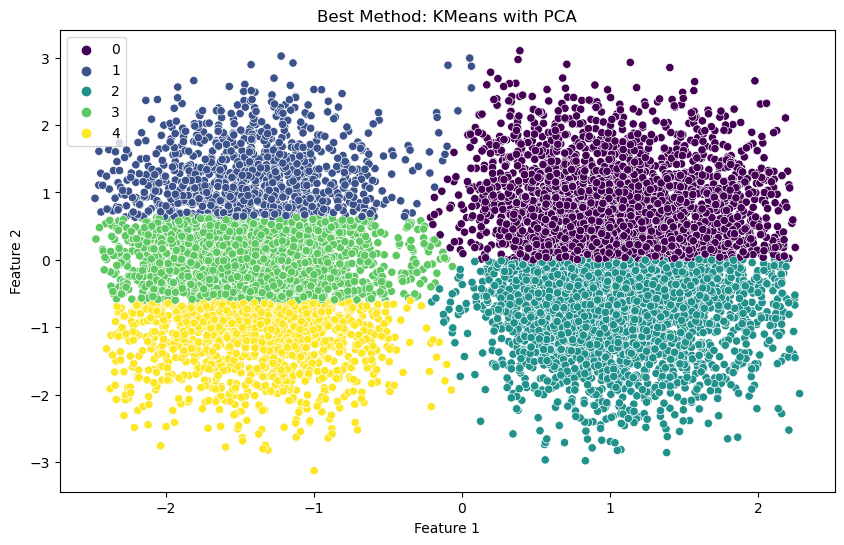

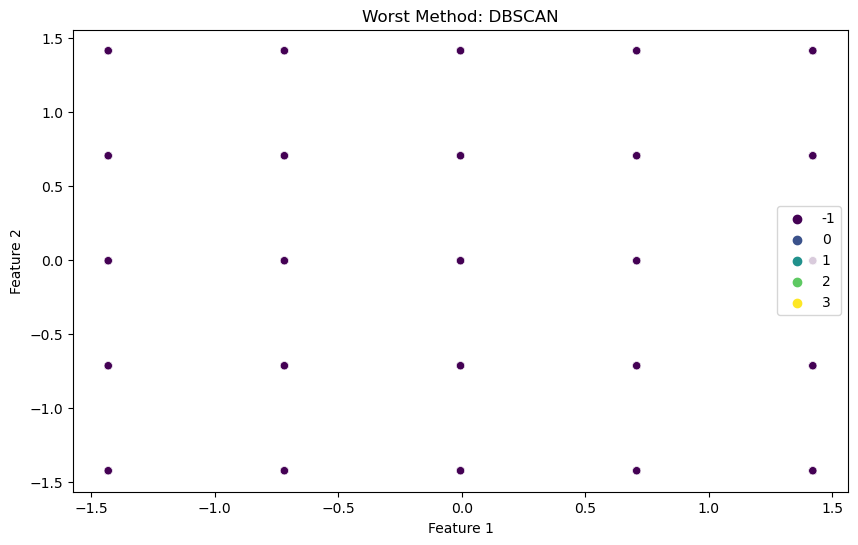

In [74]:
# Plot clusters for the best and worst methods
best_method = scores[-1]
worst_method = scores[0]
plot_clusters(best_method[3], best_method[2], f'Best Method: {best_method[0]}')
plot_clusters(worst_method[3], worst_method[2], f'Worst Method: {worst_method[0]}')